<a href="https://colab.research.google.com/github/RapaDewan/CSE445_Machine_Learning/blob/main/CSE445_attempt_5/CSE445_attempt_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pickle

# Upload the pickle file
uploaded = files.upload()

# Assuming the file name is df_cleaned.pkl after uploading
with open('df_cleaned.pkl', 'rb') as file:
    df_loaded = pickle.load(file)

# Display the loaded DataFrame
print(df_loaded)

Saving df_cleaned.pkl to df_cleaned.pkl
        price vehicleType  yearOfRegistration    gearbox  powerPS  \
0        9800         suv                2004  automatik      163   
1        1500  kleinwagen                2001    manuell       75   
2        3600  kleinwagen                2008    manuell       69   
3         650   limousine                1995    manuell      102   
4        2200      cabrio                2004    manuell      109   
...       ...         ...                 ...        ...      ...   
299858   3200   limousine                2004    manuell      225   
299860   1199      cabrio                2000  automatik      101   
299861   9200         bus                1996    manuell      102   
299862   3400       kombi                2002    manuell      100   
299863  28990   limousine                2013    manuell      320   

              model  kilometer  monthOfRegistration fuelType       brand  
0             grand     125000                    8   di

In [2]:
# Renaming df_loaded to df
df = df_loaded

# Now you can use 'df' instead of 'df_loaded' for further operations
print(df)


        price vehicleType  yearOfRegistration    gearbox  powerPS  \
0        9800         suv                2004  automatik      163   
1        1500  kleinwagen                2001    manuell       75   
2        3600  kleinwagen                2008    manuell       69   
3         650   limousine                1995    manuell      102   
4        2200      cabrio                2004    manuell      109   
...       ...         ...                 ...        ...      ...   
299858   3200   limousine                2004    manuell      225   
299860   1199      cabrio                2000  automatik      101   
299861   9200         bus                1996    manuell      102   
299862   3400       kombi                2002    manuell      100   
299863  28990   limousine                2013    manuell      320   

              model  kilometer  monthOfRegistration fuelType       brand  
0             grand     125000                    8   diesel        jeep  
1              golf  

In [3]:
df

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand
0,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep
1,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen
2,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda
3,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw
4,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot
...,...,...,...,...,...,...,...,...,...,...
299858,3200,limousine,2004,manuell,225,leon,150000,5,benzin,seat
299860,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart
299861,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen
299862,3400,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen


In [4]:
# Display information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 269217 entries, 0 to 299863
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   price                269217 non-null  int64 
 1   vehicleType          269217 non-null  object
 2   yearOfRegistration   269217 non-null  int64 
 3   gearbox              269217 non-null  object
 4   powerPS              269217 non-null  int64 
 5   model                269217 non-null  object
 6   kilometer            269217 non-null  int64 
 7   monthOfRegistration  269217 non-null  int64 
 8   fuelType             269217 non-null  object
 9   brand                269217 non-null  object
dtypes: int64(5), object(5)
memory usage: 22.6+ MB


In [5]:
# Get the count of unique values for each column
for column in ['fuelType', 'vehicleType', 'gearbox', 'model', 'brand']:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")

Value counts for fuelType:
fuelType
benzin     173778
diesel      90528
lpg          4133
cng           454
hybrid        209
andere         61
elektro        54
Name: count, dtype: int64


Value counts for vehicleType:
vehicleType
limousine     79059
kleinwagen    60986
kombi         55333
bus           25412
cabrio        19114
coupe         15081
suv           12343
andere         1889
Name: count, dtype: int64


Value counts for gearbox:
gearbox
manuell      206544
automatik     62673
Name: count, dtype: int64


Value counts for model:
model
golf               22026
andere             20264
3er                16314
polo                9222
corsa               8612
                   ...  
serie_2                4
rangerover             4
samara                 3
serie_3                3
discovery_sport        1
Name: count, Length: 250, dtype: int64


Value counts for brand:
brand
volkswagen       56704
bmw              31591
mercedes_benz    27535
opel             27088
audi      

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [8]:
# Initialize LabelEncoder
label_encoders = {}

# Encode categorical features
categorical_columns = ['vehicleType', 'gearbox', 'model', 'fuelType', 'brand']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for potential inverse transformation


In [9]:
# Features and target
X = df.drop('price', axis=1)
y = df['price']

# Split the data: 90% train, 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [10]:
# Create the SVR model
svr = SVR(kernel='rbf')

# Scale the features using StandardScaler (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit the scaler to the training data
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

# Train the SVR model on the scaled data
svr.fit(X_train_scaled, y_train_scaled.ravel())

# Model is now created and trained on the training data


SVR()

In [11]:
# Scale the test data using the same scaler used for training
X_test_scaled = scaler_X.transform(X_test)

# Predict on the test set
y_pred_scaled = svr.predict(X_test_scaled)

# Inverse transform the predicted values to get the actual scale of 'price'
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# y_pred now contains the predicted values for the test set


In [12]:
# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


RMSE: 104751.15070554374
R² Score: -0.051071476218053524


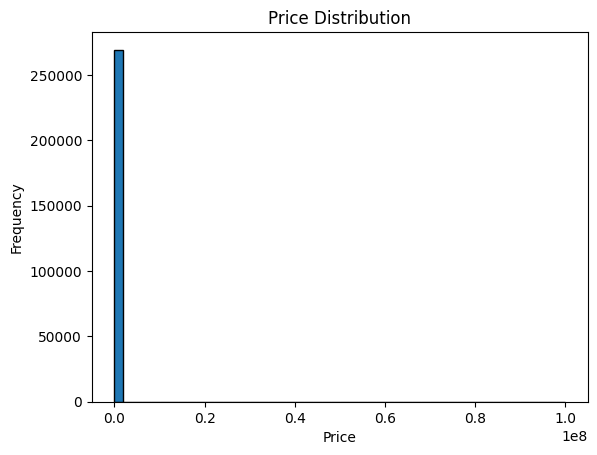

In [13]:
import matplotlib.pyplot as plt

# Visualize the price distribution
plt.hist(y, bins=50, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Remove outliers (e.g., prices in the top 1%)
q99 = df['price'].quantile(0.99)
df = df[df['price'] < q99]


In [14]:
# Remove extreme outliers (e.g., above 99th percentile)
q99 = df['price'].quantile(0.99)
df = df[df['price'] < q99]

# Remove rows with zero or negative price if present
df = df[df['price'] > 0]

In [15]:
# Apply log transformation to 'price'
df['price'] = np.log1p(df['price'])  # log1p to handle zero safely

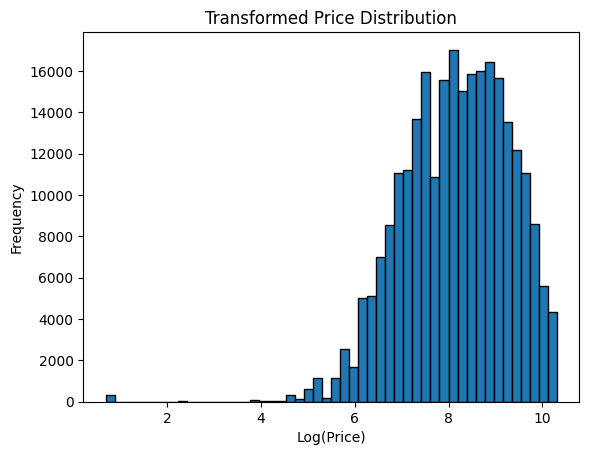

In [16]:
# Re-plot the price distribution
plt.hist(df['price'], bins=50, edgecolor='black')
plt.title('Transformed Price Distribution')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()


In [17]:
from sklearn.preprocessing import MinMaxScaler

# Define the numeric columns
numeric_columns = ['yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration']

# Initialize the scaler
scaler = MinMaxScaler()

# Apply scaling to the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("Numeric features scaled successfully!")

Numeric features scaled successfully!


In [18]:
# Frequency encoding for model and brand
for col in ['model', 'brand']:
    freq_map = df[col].value_counts(normalize=True).to_dict()
    df[col] = df[col].map(freq_map)

print("Frequency encoding applied to 'model' and 'brand'.")

Frequency encoding applied to 'model' and 'brand'.


In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}

categorical_columns = ['vehicleType', 'gearbox', 'fuelType']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Label encoding applied to categorical features.")

Label encoding applied to categorical features.


In [20]:
# Define features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

print("Features and target prepared!")

Features and target prepared!


In [21]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

print(f"Data split completed! Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Data split completed! Training samples: 237462, Testing samples: 26385


In [22]:
from sklearn.svm import SVR

# Initialize the SVR model
svr_model = SVR(
    kernel='rbf',     # Radial Basis Function kernel
    C=1.0,            # Regularization parameter
    epsilon=0.1       # Epsilon in the epsilon-SVR model
)

# Train the model on the training data
svr_model.fit(X_train, y_train)

print("SVR model trained successfully!")


SVR model trained successfully!


In [23]:
# Predict the log-transformed price
y_pred_log = svr_model.predict(X_test)
print("Log-transformed price predictions completed!")


Log-transformed price predictions completed!


In [24]:
# Convert predictions back to the original scale
y_pred = np.expm1(y_pred_log)  # Reverse log1p transformation for predictions
y_test_original = np.expm1(y_test)  # Reverse log1p transformation for test targets

print("Predictions and test targets converted back to the original scale!")


Predictions and test targets converted back to the original scale!


In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
print(f"RMSE: {rmse:.2f}")

# Calculate R² score
r2 = r2_score(y_test_original, y_pred)
print(f"R² Score: {r2:.2f}")

RMSE: 872409.74
R² Score: -21382.01


In [32]:
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Length of y_test:", len(y_test))


Shape of X_test_scaled: (26922, 9)
Length of y_test: 26385


In [33]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Length of y_train:", len(y_train))
print("Length of y_test:", len(y_test))


Shape of X_train: (237462, 9)
Shape of X_test: (26385, 9)
Length of y_train: 237462
Length of y_test: 26385


In [34]:
from sklearn.model_selection import train_test_split

# Re-split data (ensures no data loss or misalignment)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)


In [35]:
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Length of y_test:", len(y_test))


Shape of X_test_scaled: (26922, 9)
Length of y_test: 26385


In [31]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Calculate permutation importance
result = permutation_importance(svr, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Extract feature importance and corresponding feature names
importance = result.importances_mean
feature_names = X_test.columns

# Sort features by importance
sorted_idx = np.argsort(importance)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importance = importance[sorted_idx]

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:10], sorted_importance[:10], color="skyblue")
plt.xlabel("Permutation Importance")
plt.title("Top 10 Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [26385, 26922]

In [ ]:
import pandas as pd

# Create a DataFrame to compare actual and predicted prices
comparison_df = pd.DataFrame({
    'Actual Price': y_test,  # Actual prices on the same scale as y_test
    'Predicted Price': y_pred  # Predicted prices on the same scale as y_pred_log
})

# Add a column for the difference
comparison_df['Difference'] = comparison_df['Actual Price'] - comparison_df['Predicted Price']

# Display the first few rows to confirm
print(comparison_df.head())


In [ ]:
# Plot the first 50 predictions
comparison_df.head(50).plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Actual and Predicted Prices (First 50 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.show()

In [ ]:
# Add the absolute difference as a column
comparison_df['Absolute Difference'] = comparison_df['Difference'].abs()

# Sort the DataFrame by the absolute difference
comparison_df_sorted = comparison_df.sort_values(by='Absolute Difference', ascending=True)

# Select the top 50 rows with the smallest differences
top_50_small_diff = comparison_df_sorted.head(50)


In [ ]:
# Convert X_test_scaled back to a DataFrame for better interpretability
X_test_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)  # Use X_train columns for column names

# Reset indices for alignment
y_test_original = y_test_original.reset_index(drop=True)
X_test_df = X_test_df.reset_index(drop=True)

# Assuming y_pred is already the predicted values on the original scale (after np.expm1)
comparison_df = pd.DataFrame({
    'Actual Price': y_test_original,  # Actual prices (original scale)
    'Predicted Price': y_pred         # Predicted prices (original scale)
})

# Merge feature data with the comparison DataFrame
comparison_with_features = pd.concat([X_test_df, comparison_df], axis=1)

# Rename columns for clarity
comparison_with_features.rename(columns={'Actual Price': 'Actual Price',
                                         'Predicted Price': 'Predicted Price'}, inplace=True)

# Display the first few rows to confirm
print(comparison_with_features.head())


In [ ]:
# Show the first 50 instances with minimal differences
print(comparison_with_features.head(50))

# Save to CSV for sharing, if needed
comparison_with_features.to_csv('top_50_small_diff_comparison.csv', index=False)


In [ ]:
# Visualize the top 50 comparisons
comparison_with_features[['Actual Price', 'Predicted Price']].head(50).plot(kind='bar', figsize=(12, 6))
plt.title('Actual vs Predicted Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend(['Actual Price', 'Predicted Price'])
plt.show()

In [ ]:
# Check the minimum and maximum values of the price column in the original DataFrame
min_price = df['price'].min()
max_price = df['price'].max()

print(f"Price Range in the DataFrame before training: {min_price} - {max_price}")


In [ ]:
# Step 1: Select the 1507th row from the training features (X_train)
index_to_predict = 1507

# Extract the feature values (all columns) from the 1507th row
sample_train_features = X_train.iloc[index_to_predict].values.reshape(1, -1)  # Reshape to 2D array for prediction

# Step 2: Predict the price using the trained model
predicted_price_log_train = xgb_regressor.predict(sample_train_features)  # Model predicts in log scale
predicted_price_train = np.expm1(predicted_price_log_train)  # Convert from log scale to original price scale

# Step 3: Retrieve the actual price for this index from the training target values (y_train)
# Apply the inverse log transformation to get the actual price
actual_price_train_log = y_train.iloc[index_to_predict]  # Log-transformed price
actual_price_train = np.expm1(actual_price_train_log)  # Convert back to original price scale

# Step 4: Compute the difference between the actual and predicted prices
price_difference_train = actual_price_train - predicted_price_train

# Step 5: Display the actual price, predicted price, and the difference
print(f"Index: {index_to_predict}")
print(f"Actual Price (Train Set) - Original Scale: {actual_price_train:.2f}")
print(f"Predicted Price: {predicted_price_train[0]:.2f}")
print(f"Difference (Actual - Predicted): {price_difference_train[0]:.2f}")


In [ ]:
# Step 1: Select the 1507th row from the training features (X_train)
index_to_predict = 200145

# Extract the feature values (all columns) from the 1507th row
sample_train_features = X_train.iloc[index_to_predict].values.reshape(1, -1)  # Reshape to 2D array for prediction

# Step 2: Predict the price using the trained model
predicted_price_log_train = xgb_regressor.predict(sample_train_features)  # Model predicts in log scale
predicted_price_train = np.expm1(predicted_price_log_train)  # Convert from log scale to original price scale

# Step 3: Retrieve the actual price for this index from the training target values (y_train)
# Apply the inverse log transformation to get the actual price
actual_price_train_log = y_train.iloc[index_to_predict]  # Log-transformed price
actual_price_train = np.expm1(actual_price_train_log)  # Convert back to original price scale

# Step 4: Compute the difference between the actual and predicted prices
price_difference_train = actual_price_train - predicted_price_train

# Step 5: Display the actual price, predicted price, and the difference
print(f"Index: {index_to_predict}")
print(f"Actual Price (Train Set) - Original Scale: {actual_price_train:.2f}")
print(f"Predicted Price: {predicted_price_train[0]:.2f}")
print(f"Difference (Actual - Predicted): {price_difference_train[0]:.2f}")


In [ ]:
import matplotlib.pyplot as plt

# Define the metrics
rmse = 2059.020217771642
r2_score = 0.8808897972952632

# Plot RMSE with text annotation
plt.figure(figsize=(8, 5))
plt.bar(['RMSE'], [rmse], color='blue')
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('Value')
plt.ylim(0, rmse + 500)  # Adjust the y-axis limit for RMSE

# Add a text annotation with RMSE description
plt.text(0, rmse + 100,
         f"The RMSE = {rmse:.2f}\nmeans on average the squared differences\n"
         "between the predicted values and the actual values\n"
         "are off by about 2059 dollars.",
         ha='center', va='bottom', fontsize=10, color='black', fontweight='light')

plt.show()

# Plot R² Score with text annotation
plt.figure(figsize=(8, 5))
plt.bar(['R² Score'], [r2_score], color='green')
plt.title('R² Score')
plt.ylabel('Value')
plt.ylim(0, 1)  # Since R² Score is between 0 and 1

# Add a text annotation with R² description
plt.text(0, r2_score + 0.03,
         f"88% accuracy achieved",
         ha='center', va='bottom', fontsize=12, color='black', fontweight='light')

plt.show()
